In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Datasets/Passwords.csv", on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data.shape

(669640, 2)

In [4]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

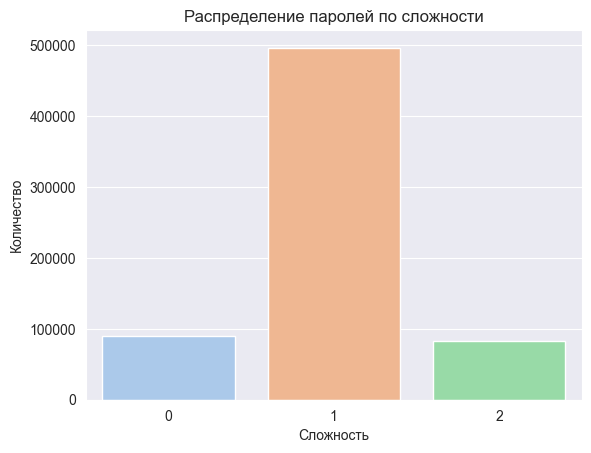

In [6]:
sns.countplot(x='strength', data=data, palette='pastel')
plt.xlabel('Сложность')
plt.ylabel('Количество')
plt.title('Распределение паролей по сложности')
plt.show()

In [7]:
x = np.array(data["password"])
y = np.array(data["strength"])

### Определим функции для разделения входных данных на список отдельных символов

In [8]:
def word(password):
    character = []
    for i in password:
        character.append(i)
    return character

#### Используем TF-IDF векторизатор для преобразования строковых данных в числовые

In [9]:
tdif = TfidfVectorizer(tokenizer=word)
X = tdif.fit_transform(x)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(535711, 153)

# Используем случайный лес

In [13]:
model = RandomForestClassifier(verbose=10, n_jobs=20)
model.fit(X_train, y_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   45.3s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  1.0min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:  1.5min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100


[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:  2.1min


building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100


[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:  2.3min


building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100


[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:  3.0min


building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100


[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:  3.7min remaining:  1.5min


building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:  4.1min remaining:   50.9s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:  4.5min remaining:   17.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:  4.6min finished


RandomForestClassifier(n_jobs=20, verbose=10)

In [14]:
model.score(X_test, y_test)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.7s finished


0.9561630129621886

In [15]:
y_pred = model.predict(X_test)
y_pred

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.8s finished


array([1, 1, 2, ..., 1, 2, 1], dtype=int64)

### Прогноз по нашему паролю

In [22]:
usrpwd = "P3rrYU%tk0$n0s#"
data = tdif.transform([usrpwd]).toarray()
pwd_strength = model.predict(data)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
pwd_strength[0]

2

2 - Сложный пароль (средняя сложность)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     17908
           1       0.96      0.99      0.97     99519
           2       0.96      0.91      0.93     16501

    accuracy                           0.96    133928
   macro avg       0.96      0.91      0.93    133928
weighted avg       0.96      0.96      0.96    133928


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[14814  3090     4]
 [  640 98278   601]
 [   20  1516 14965]]
0.9561630129621886


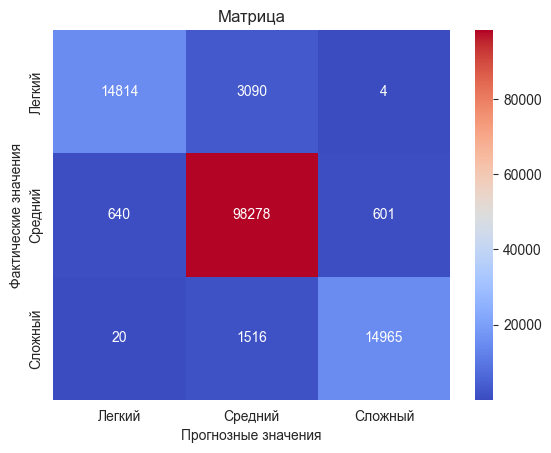

In [27]:
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
            xticklabels=['Легкий', 'Средний', 'Сложный'], yticklabels=['Легкий', 'Средний', 'Сложный'])
plt.xlabel('Прогнозные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица')
plt.show()